# Time Serie
## Offshore WA OR park: rotor 

In [1]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
path = '/Users/tmorales/tmp/RNN-windPower/database/wind_farms/Offshore_WA_OR/Offshore_WA_OR_features'

In [3]:
os.chdir(path)
files = [file for file in glob.glob('Offshore_WA_OR_features_*.csv')]
files

['Offshore_WA_OR_features_h_01.csv',
 'Offshore_WA_OR_features_h_02.csv',
 'Offshore_WA_OR_features_h_03.csv',
 'Offshore_WA_OR_features_h_04.csv',
 'Offshore_WA_OR_features_h_05.csv',
 'Offshore_WA_OR_features_h_06.csv',
 'Offshore_WA_OR_features_h_07.csv',
 'Offshore_WA_OR_features_h_08.csv',
 'Offshore_WA_OR_features_h_09.csv',
 'Offshore_WA_OR_features_h_10.csv',
 'Offshore_WA_OR_features_h_11.csv',
 'Offshore_WA_OR_features_h_12.csv',
 'Offshore_WA_OR_features_h_13.csv',
 'Offshore_WA_OR_features_h_14.csv',
 'Offshore_WA_OR_features_h_15.csv',
 'Offshore_WA_OR_features_h_16.csv',
 'Offshore_WA_OR_features_h_17.csv',
 'Offshore_WA_OR_features_h_18.csv',
 'Offshore_WA_OR_features_h_19.csv',
 'Offshore_WA_OR_features_h_20.csv',
 'Offshore_WA_OR_features_h_21.csv',
 'Offshore_WA_OR_features_h_22.csv',
 'Offshore_WA_OR_features_h_23.csv',
 'Offshore_WA_OR_features_h_24.csv']

In [4]:
h1 = pd.read_csv(os.path.join(path, files[0]), delimiter=';', index_col=0)
h1.head()

,f_0,f_1,f_2,f_3,f_4,f_5,target_h1
target_date,,,,,,,
2004-01-01 06:00:00,6.96,5.28,5.32,4.93,4.05,3.95,4.19
2004-01-01 07:00:00,5.28,5.32,4.93,4.05,3.95,4.19,4.89
2004-01-01 08:00:00,5.32,4.93,4.05,3.95,4.19,4.89,5.16
2004-01-01 09:00:00,4.93,4.05,3.95,4.19,4.89,5.16,5.01
2004-01-01 10:00:00,4.05,3.95,4.19,4.89,5.16,5.01,5.57


In [5]:
h1['persis_h1'] = h1[['target_h1']].shift(periods=1)

In [6]:
h1.head()

,f_0,f_1,f_2,f_3,f_4,f_5,target_h1,persis_h1
target_date,,,,,,,,
2004-01-01 06:00:00,6.96,5.28,5.32,4.93,4.05,3.95,4.19,NaN
2004-01-01 07:00:00,5.28,5.32,4.93,4.05,3.95,4.19,4.89,4.19
2004-01-01 08:00:00,5.32,4.93,4.05,3.95,4.19,4.89,5.16,4.89
2004-01-01 09:00:00,4.93,4.05,3.95,4.19,4.89,5.16,5.01,5.16
2004-01-01 10:00:00,4.05,3.95,4.19,4.89,5.16,5.01,5.57,5.01


In [7]:
df_persistence = []
for i, file in enumerate(files): 
    i = i+1
    df = pd.read_csv(os.path.join(path, file), delimiter=';', index_col=0)
    df['presis_h{0}'.format(i)] = df[['target_h{0}'.format(i)]].shift(periods=i)
    df_persistence.append(df[['target_h{0}'.format(i), 'presis_h{0}'.format(i)]])

In [8]:
df_target_persis = pd.concat(df_persistence, axis=1)
df_target_persis.head()

,target_h1,presis_h1,target_h2,presis_h2,target_h3,presis_h3,target_h4,presis_h4,target_h5,presis_h5,...,target_h20,presis_h20,target_h21,presis_h21,target_h22,presis_h22,target_h23,presis_h23,target_h24,presis_h24
2004-01-01 06:00:00,4.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 07:00:00,4.89,4.19,4.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 08:00:00,5.16,4.89,5.16,NaN,5.16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 09:00:00,5.01,5.16,5.01,4.89,5.01,NaN,5.01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 10:00:00,5.57,5.01,5.57,5.16,5.57,NaN,5.57,NaN,5.57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
columns = []
for i in range(1, 25):
    columns.append('target_h{0}'.format(i))
    columns.append('presis_h{0}'.format(i))

df_target_persis = df_target_persis[columns]
df_target_persis

,target_h1,presis_h1,target_h2,presis_h2,target_h3,presis_h3,target_h4,presis_h4,target_h5,presis_h5,...,target_h20,presis_h20,target_h21,presis_h21,target_h22,presis_h22,target_h23,presis_h23,target_h24,presis_h24
2004-01-01 06:00:00,4.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 07:00:00,4.89,4.19,4.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 08:00:00,5.16,4.89,5.16,NaN,5.16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 09:00:00,5.01,5.16,5.01,4.89,5.01,NaN,5.01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 10:00:00,5.57,5.01,5.57,5.16,5.57,NaN,5.57,NaN,5.57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 11:00:00,5.74,5.57,5.74,5.01,5.74,5.16,5.74,NaN,5.74,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 12:00:00,3.90,5.74,3.90,5.57,3.90,5.01,3.90,NaN,3.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 13:00:00,4.02,3.90,4.02,5.74,4.02,5.57,4.02,5.01,4.02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 14:00:00,4.30,4.02,4.30,3.90,4.30,5.74,4.30,5.57,4.30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-01 15:00:00,4.64,4.30,4.64,4.02,4.64,3.90,4.64,5.74,4.64,5.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
train_size = int((df.shape[0] * 80) / 100)
# Test set.
df_train_set = df_target_persis.iloc[0:train_size]
df_test_set = df_target_persis.iloc[train_size:]

df_test_set.head()

,target_h1,presis_h1,target_h2,presis_h2,target_h3,presis_h3,target_h4,presis_h4,target_h5,presis_h5,...,target_h20,presis_h20,target_h21,presis_h21,target_h22,presis_h22,target_h23,presis_h23,target_h24,presis_h24
2006-05-26 02:00:00,4.51,3.88,4.51,4.18,4.51,6.07,4.51,8.46,4.51,8.36,...,4.51,6.71,4.51,7.14,4.51,6.67,4.51,6.12,4.51,5.39
2006-05-26 03:00:00,5.56,4.51,5.56,3.88,5.56,4.18,5.56,6.07,5.56,8.46,...,5.56,6.78,5.56,6.71,5.56,7.14,5.56,6.67,5.56,6.12
2006-05-26 04:00:00,5.75,5.56,5.75,4.51,5.75,3.88,5.75,4.18,5.75,6.07,...,5.75,6.30,5.75,6.78,5.75,6.71,5.75,7.14,5.75,6.67
2006-05-26 05:00:00,5.97,5.75,5.97,5.56,5.97,4.51,5.97,3.88,5.97,4.18,...,5.97,5.74,5.97,6.30,5.97,6.78,5.97,6.71,5.97,7.14
2006-05-26 06:00:00,5.65,5.97,5.65,5.75,5.65,5.56,5.65,4.51,5.65,3.88,...,5.65,5.97,5.65,5.74,5.65,6.30,5.65,6.78,5.65,6.71


* **First moment of the prediction error:** 
    * BIAS
    * MAE

    These measure are directly related to the produced energy.

* **Second moment of the prediction error:**
    * RMSE
    * MAE

    These measure are related to the variance of the prediction error.

In [11]:
def bias(y_true, y_pred):
    return np.sum(y_true - y_pred) /len(y_pred)

In [12]:
y_true = df_test_set['target_h1'].values 
y_pred = df_test_set['presis_h1'].values

np.sum(y_true - y_pred) / len(y_true)

-0.0006119742326638868

In [13]:
bias(y_true, y_pred)

-0.0006119742326638868

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

dic_persis_mae = {}; dic_persis_bias = {}
dic_persis_rmse = {}; dic_persis_std = {}

for i in range(1, 25):
    y_true = df_test_set['target_h{0}'.format(i)].values
    y_pred = df_test_set['presis_h{0}'.format(i)].values
    
    # first moment of the prediction errror
    mae = mean_absolute_error(y_true, y_pred)
    #bias = bias(y_true, y_pred)
    # second moment of the prediction error
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    
    dic_persis_mae['persis_h{0}'.format(i)] = [mae]
    #dic_persis_bias['persis_h{0}'.format(i)] = [bias]
    #dic_persis_mse['persis_h{0}'.format(i)] = [mse]
    dic_persis_rmse['persis_h{0}'.format(i)] = [rmse]
  

In [15]:
df_persis_mae = pd.DataFrame(dic_persis_mae)
df_persis_mae = df_persis_mae[['persis_h{0}'.format(i) for i in range(1, 25)]]
df_persis_mae = df_persis_mae.T
df_persis_mae.columns = ['mae']

In [16]:
df_persis_rmse = pd.DataFrame(dic_persis_rmse) 
df_persis_rmse = df_persis_rmse[['persis_h{0}'.format(i) for i in range(1, 25)]]
df_persis_rmse = df_persis_rmse.T
df_persis_rmse.columns = ['rmse']

In [17]:
df_persis_errors = pd.concat([df_persis_mae, df_persis_rmse], axis=1)
df_persis_errors.head()

,mae,rmse
persis_h1,0.595239,0.942073
persis_h2,1.012048,1.542620
persis_h3,1.333888,1.969268
persis_h4,1.597696,2.307254
persis_h5,1.826336,2.594592


### First moment of the prediction error

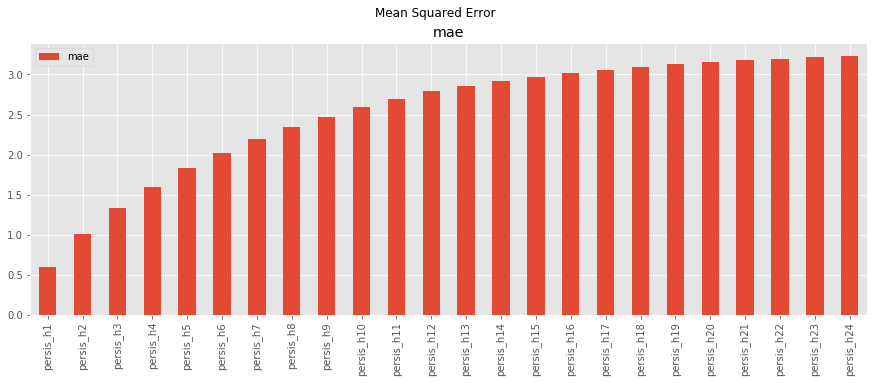

In [18]:
df_persis_errors[['mae']].plot(kind='bar',
                     figsize=(15,5),
                     title='Mean Squared Error',
                     subplots=True);

### Second moment of the prediction error 

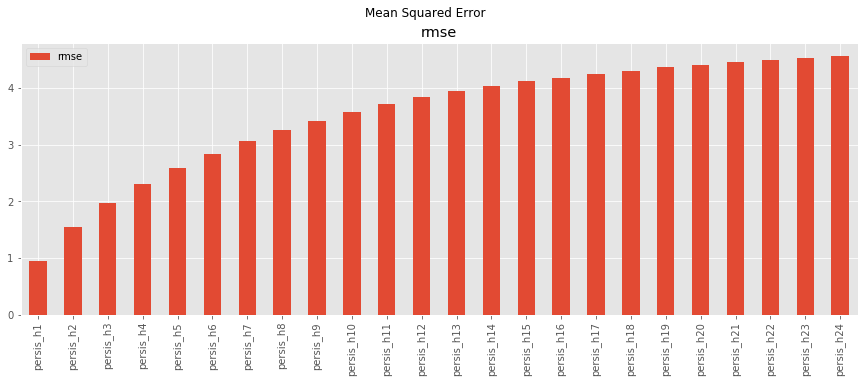

In [19]:
df_persis_errors[['rmse']].plot(kind='bar',
                                figsize=(15,5),
                                title='Mean Squared Error',
                                subplots=True);

In [20]:
exp_path = '/Users/tmorales/tmp/experiments/NREL/Offshore_WA_OR/turbine_25915'
df_persis_errors.to_csv(os.path.join(exp_path, 'test_persistence.csv'),
                         sep=';',
                         index=True)

In [21]:
os.path.join(exp_path, 'persistence.csv')

'/Users/tmorales/tmp/experiments/NREL/Offshore_WA_OR/turbine_25915/persistence.csv'

In [23]:
ls /Users/tmorales/tmp/experiments/NREL/Offshore_WA_OR/turbine_25915/persistence.csv

ls: /Users/tmorales/tmp/experiments/NREL/Offshore_WA_OR/turbine_25915/persistence.csv: No such file or directory
